In [1]:
import time
start = time.time()

In [2]:
import os 
import nltk 
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from collections import Counter
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from nltk.corpus import stopwords 
os.chdir('E:/VINOD KUMAR/Project_IPM')
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
actual_data=pd.read_excel("Train_data_IPM Jan,2017-Mar,2018.xlsx")
#test_data=pd.read_csv("IPM To be processed May 2018.csv")
test_data=pd.read_excel("IPM June1-17, 2018.xlsx")

In [4]:
print(actual_data.shape,actual_data.info())
print(test_data.shape,test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109903 entries, 0 to 109902
Data columns (total 7 columns):
tran_id                 109903 non-null int64
tran_date               109903 non-null object
forwhom_id              109903 non-null int64
schedule_note           109882 non-null object
Categories1             109903 non-null object
Sub_categories1         109903 non-null object
Previous_Appointment    109903 non-null object
dtypes: int64(2), object(5)
memory usage: 5.9+ MB
(109903, 7) None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 7 columns):
tran_id                 4882 non-null int64
tran_date               4882 non-null datetime64[ns]
forwho_id               4882 non-null int64
schedule_note           4877 non-null object
Categories1             4882 non-null object
Sub_categories1         4882 non-null object
Previous_Appointment    4882 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 267.1+ K

In [5]:
actual_data.head()

,tran_id,tran_date,forwhom_id,schedule_note,Categories1,Sub_categories1,Previous_Appointment
0,672852,2016-07-08,30570,conf nc,APPOINTMENTS,NEW APPOINTMENT,No
1,673452,2016-07-11,3603,"lvm, NN",MISCELLANEOUS,OTHERS,No
2,673800,2016-07-12,22281,conf nc,APPOINTMENTS,NEW APPOINTMENT,No
3,674558,2016-07-13,24646,Records being sent to ANTIOCH,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No
4,676145,2016-07-18,22072,conf nc,APPOINTMENTS,NEW APPOINTMENT,No


In [6]:
actual_data.columns

Index(['tran_id', 'tran_date', 'forwhom_id', 'schedule_note', 'Categories1',
       'Sub_categories1', 'Previous_Appointment'],
      dtype='object')

In [7]:
ax = actual_data.groupby("Categories1").size().plot(kind="bar", figsize=(8, 5))
print(actual_data.Categories1.value_counts(),ax)

MISCELLANEOUS    49989
APPOINTMENTS     47506
PRESCRIPTION      9625
ASK_A_DOCTOR      2077
LAB                706
Name: Categories1, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77)


OTHERS                                           49322
NEW APPOINTMENT                                  43591
REFILL                                            8967
RESCHEDULING                                      3210
MEDICATION RELATED                                1696
LAB RESULTS                                        644
PRIOR AUTHORIZATION                                603
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)      550
SYMPTOMS                                           381
RUNNING LATE TO APPOINTMENT                        337
QUERY ON CURRENT APPOINTMENT                       287
CHANGE OF PROVIDER                                 115
CANCELLATION                                        82
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)          61
PROVIDER                                            53
CHANGE OF HOSPITAL                                   2
FOLLOW UP ON PREVIOUS REQUEST                        1
QUERIES FROM PHARMACY                                1
Name: Sub_

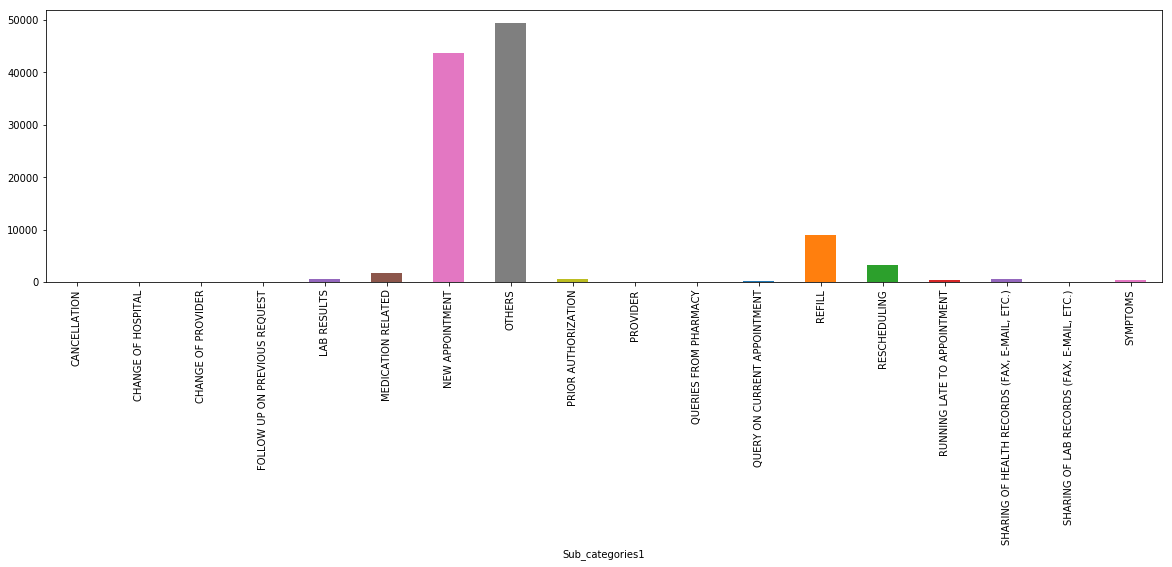

In [8]:
ax = actual_data.groupby("Sub_categories1").size().plot(kind="bar", figsize=(20,5))
print(actual_data.Sub_categories1.value_counts(),ax)

In [9]:
len(actual_data.Sub_categories1.value_counts())

18

In [10]:
test_data.Categories1.value_counts()

MISCELLANEOUS    2178
APPOINTMENTS     2040
PRESCRIPTION      573
ASK_A_DOCTOR       65
LAB                26
Name: Categories1, dtype: int64

MISCELLANEOUS    2178
APPOINTMENTS     2040
PRESCRIPTION      573
ASK_A_DOCTOR       65
LAB                26
Name: Categories1, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


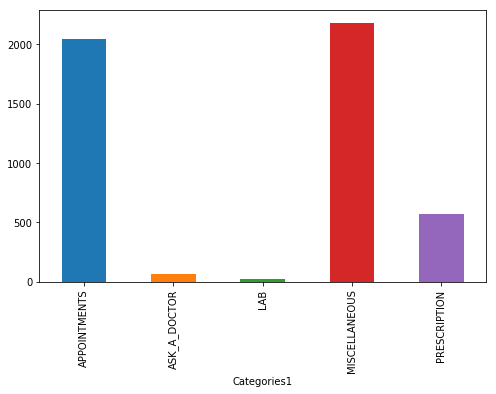

In [11]:
ax = test_data.groupby("Categories1").size().plot(kind="bar", figsize=(8, 5))
print(test_data.Categories1.value_counts(),ax)

OTHERS                                           2109
NEW APPOINTMENT                                  1949
REFILL                                            545
RESCHEDULING                                       80
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)      65
SYMPTOMS                                           40
PRIOR AUTHORIZATION                                25
MEDICATION RELATED                                 25
LAB RESULTS                                        25
RUNNING LATE TO APPOINTMENT                         5
QUERY ON CURRENT APPOINTMENT                        5
PROVIDER                                            3
CHANGE OF PROVIDER                                  3
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)          1
CHANGE OF HOSPITAL                                  1
CANCELLATION                                        1
Name: Sub_categories1, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


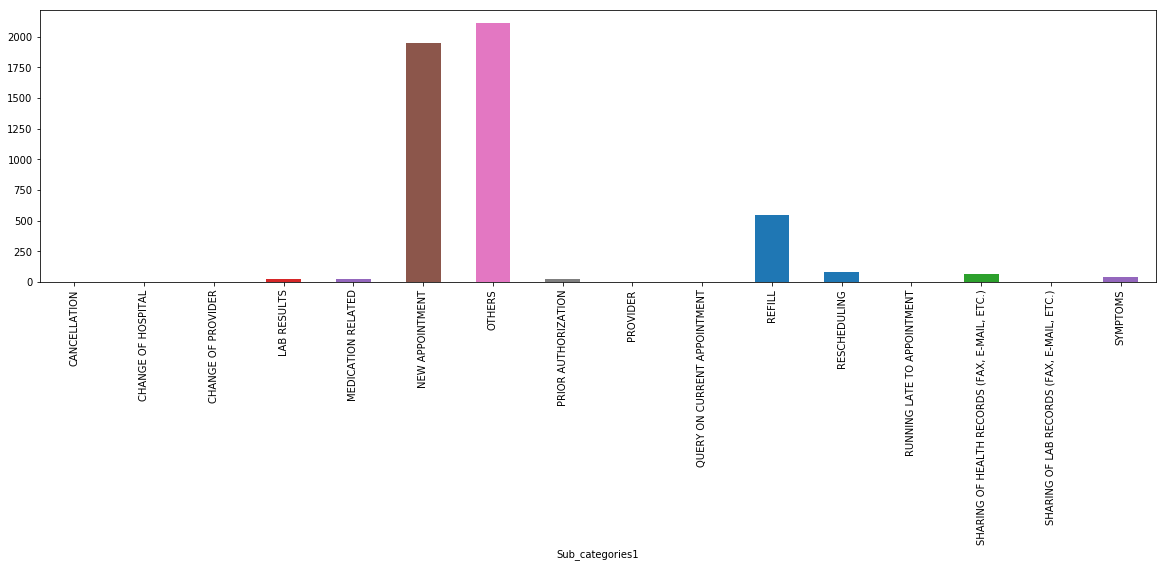

In [12]:
ax = test_data.groupby("Sub_categories1").size().plot(kind="bar", figsize=(20,5))
print(test_data.Sub_categories1.value_counts(),ax)

In [13]:
test_data.Sub_categories1.value_counts()

OTHERS                                           2109
NEW APPOINTMENT                                  1949
REFILL                                            545
RESCHEDULING                                       80
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)      65
SYMPTOMS                                           40
PRIOR AUTHORIZATION                                25
MEDICATION RELATED                                 25
LAB RESULTS                                        25
RUNNING LATE TO APPOINTMENT                         5
QUERY ON CURRENT APPOINTMENT                        5
PROVIDER                                            3
CHANGE OF PROVIDER                                  3
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)          1
CHANGE OF HOSPITAL                                  1
CANCELLATION                                        1
Name: Sub_categories1, dtype: int64

In [14]:
test_data.Categories1=test_data.Categories1.astype("category")
test_data.Sub_categories1=test_data.Sub_categories1.astype("category")
test_data.Previous_Appointment=test_data.Previous_Appointment.astype("category")

In [15]:
#Converting datatype of actual_data1 variables 
actual_data.schedule_note =actual_data.schedule_note.astype('str')
actual_data.Categories1=actual_data.Categories1.astype("category")
actual_data.Sub_categories1=actual_data.Sub_categories1.astype("category")
actual_data.Previous_Appointment=actual_data.Previous_Appointment.astype("category")

In [16]:
#Converting datatype of test_data1 variables 
test_data.schedule_note =test_data.schedule_note.astype('str')

In [17]:
actual_data.schedule_note[:20]

0                                              conf nc 
1                                               lvm, NN
2                                              conf nc 
3                        Records being sent to ANTIOCH 
4                                              conf nc 
5                                              conf nc 
6     Rep QME Panel #: 1955967. Set fr w/l per Abby ...
7     Rep QME reeval set fr w/l per email fr Molly @...
8                                              conf nc 
9                           1st Post op appointment. tc
10                 4 of 6 covering for Dr. Fernandez.lp
11                                              lvm nc 
12                                  Covering for RF lap
13                                              lvm nc 
14                                             conf, NN
15    Rep QME - Panel #1980509, set w pt, would like...
16              Unrep PQME  Panel #1985116, set w pt.ab
17             Rep QME, set per email fr Bonnie 

In [18]:
def replacing_text(input_text):
    letters_only = re.sub("[^a-zA-Z]", " ",input_text )
    low_case = letters_only.lower()
    string  =re.sub(' pt ' or " pt's ", ' patient ', low_case)
    string  =re.sub(' appt ' or ' apt ', ' appointment ',  string)
    string  =re.sub(' appts ', ' appointment ',  string)
    #string  =re.sub(' ov ', ' office visit ',  string)
    string  =re.sub(' schd ' or ' sched ', ' scheduled ',  string)
    string  =re.sub(' np ', ' new patient ',  string)
    string  =re.sub(' r/s ' or ' rs ', ' reschedule ',  string)
    #string  =re.sub(' med ', ' medication ',  string)
    #string  =re.sub(' pa ', ' prior authorization ', string)
    #string  =re.sub(' fin ', ' financial ',  string)
    #string  =re.sub(' dept ', ' department ',  string) 
    #string  =re.sub(' meds ', ' medication ', string)
    #string  =re.sub(' tabs ', ' tablets ', string)
    #string  =re.sub(' ph ',' phone ', string)
    #string  =re.sub(' dr ',' doctor ', string)
    #string  =re.sub(' msg ',' message ', string)
    string  =re.sub(' sched ',' scheduled ', string)
    string  =re.sub(' yrly ',' yearly ', string)
    #string  =re.sub('xxx ',' ', string)
    string  =re.sub(' clld ', ' called ', string)
    string  =re.sub(' rs ',' reschedule ', string)
    #string  =re.sub(' ashley ', ' ',  string)
    string  =re.sub(' h ', ' hospital ', string)
    string  =re.sub(' ad ', ' add ', string)
    #string  =re.sub(' am ', ' ', string)
    #string  =re.sub(' am ', ' ', string)
    review_text = string
    return(review_text) 

In [19]:
def clean_str1(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    review_text = string.strip()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    return letters_only

In [20]:
import time
start = time.time()
extracted_sent1=[]
for i in range (0,len(actual_data)):
    if i%10000 == 0:
        print ("no.of rows reviews processed:",i)
    extracted_sent1.append(clean_str1(replacing_text(actual_data.schedule_note[i])))
print("Training took {:0.3f} seconds".format(time.time()-start))

no.of rows reviews processed: 0
no.of rows reviews processed: 10000
no.of rows reviews processed: 20000
no.of rows reviews processed: 30000
no.of rows reviews processed: 40000
no.of rows reviews processed: 50000
no.of rows reviews processed: 60000
no.of rows reviews processed: 70000
no.of rows reviews processed: 80000
no.of rows reviews processed: 90000
no.of rows reviews processed: 100000
Training took 4.975 seconds


In [21]:
import time
start = time.time()
test_extracted_sent1=[]
for i in range (0,len(test_data)):
    if i%10000 == 0:
        print ("no.of rows reviews processed:",i)
    test_extracted_sent1.append(clean_str1(replacing_text(test_data.schedule_note[i])))
print("Training took {:0.3f} seconds".format(time.time()-start))

no.of rows reviews processed: 0
Training took 0.201 seconds


In [22]:
actual_data["schedule_note1"]=pd.DataFrame(extracted_sent1)
test_data["schedule_note1"]=pd.DataFrame(test_extracted_sent1)

In [23]:
#Converted to lower case 
actual_data['schedule_note1'] = actual_data['schedule_note1'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_data['schedule_note1'] = test_data['schedule_note1'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [24]:
#Removal of Stop Words
stop = stopwords.words('english')+['pm','am','nan']
actual_data['schedule_note1'] = actual_data['schedule_note1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test_data['schedule_note1'] = test_data['schedule_note1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [25]:
from nltk.stem import SnowballStemmer
st = SnowballStemmer('english')
words = stopwords.words("english")

In [26]:
actual_data['schedule_note1'] = actual_data['schedule_note1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
test_data['schedule_note1'] = test_data['schedule_note1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [27]:
#Each word frequency count in Whole Corpus
freq_count_data = pd.Series(' '.join(actual_data['schedule_note1']).split()).value_counts()
len(freq_count_data)

11259

In [28]:
#freq_count_data

In [29]:
actual_data.shape

(109903, 8)

In [71]:
actual_data.Categories1.unique()

[APPOINTMENTS, MISCELLANEOUS, PRESCRIPTION, ASK_A_DOCTOR, LAB]
Categories (5, object): [APPOINTMENTS, MISCELLANEOUS, PRESCRIPTION, ASK_A_DOCTOR, LAB]

In [101]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
#test_data["Categories2"]=le.fit(test_data["Categories1"]).transform(test_data["Categories1"])

In [102]:
#actual_data["Categories2"]=le.fit(actual_data["Categories1"]).transform(actual_data["Categories1"])
#test_data["Categories2"]=le.fit(actual_data["Categories1"]).transform(test_data["Categories1"])

In [118]:
#actual_data["Sub_categories2"]=le.fit(actual_data["Sub_categories1"]).transform(actual_data["Sub_categories1"])
#test_data["Sub_categories2"]=le.fit(actual_data["Sub_categories1"]).transform(test_data["Sub_categories1"])

In [207]:
#actual_data["Categories2"].head(),actual_data["Categories1"].head()

In [208]:
#test_data["Categories2"].head(),test_data["Categories1"].head()

In [75]:
actual_APPOINTMENTS=(actual_data.loc[actual_data['Categories1'].isin(['APPOINTMENTS'])])
actual_MISCELLANEOUS=(actual_data.loc[actual_data['Categories1'].isin(['MISCELLANEOUS'])])
actual_PRESCRIPTION=(actual_data.loc[actual_data['Categories1'].isin(['PRESCRIPTION'])])
actual_ASK_A_DOCTOR=(actual_data.loc[actual_data['Categories1'].isin(['ASK_A_DOCTOR'])])
actual_LAB=(actual_data.loc[actual_data['Categories1'].isin(['LAB'])])

In [76]:
test_data_APPOINTMENTS=(test_data.loc[test_data['Categories1'].isin(['APPOINTMENTS'])])
test_data_MISCELLANEOUS=(test_data.loc[test_data['Categories1'].isin(['MISCELLANEOUS'])])
test_data_PRESCRIPTION=(test_data.loc[test_data['Categories1'].isin(['PRESCRIPTION'])])
test_data_ASK_A_DOCTORS=(test_data.loc[test_data['Categories1'].isin(['ASK_A_DOCTOR'])])
test_data_LAB=(test_data.loc[test_data['Categories1'].isin(['LAB'])])

In [31]:
X_test_1=test_data["schedule_note1"]
Y_test_1=test_data["Categories1"]
Y_test_2=test_data["Sub_categories1"]
Y_test_3=test_data["Previous_Appointment"]

In [101]:
X_test_33=test_data_APPOINTMENTS["schedule_note1"]
Y_test_33=test_data_APPOINTMENTS["Categories1"]
Y_test_33=test_data_APPOINTMENTS["Sub_categories1"]
Y_test_33=test_data_APPOINTMENTS["Previous_Appointment"]

In [87]:
actual_APPOINTMENTS["Sub_categories1"].unique()

[NEW APPOINTMENT, CANCELLATION, RESCHEDULING, RUNNING LATE TO APPOINTMENT, QUERY ON CURRENT APPOINTMENT]
Categories (5, object): [NEW APPOINTMENT, CANCELLATION, RESCHEDULING, RUNNING LATE TO APPOINTMENT, QUERY ON CURRENT APPOINTMENT]

In [32]:
len(X_test_1)

4882

In [33]:
actual_data.head()

,tran_id,tran_date,forwhom_id,schedule_note,Categories1,Sub_categories1,Previous_Appointment,schedule_note1
0,672852,2016-07-08,30570,conf nc,APPOINTMENTS,NEW APPOINTMENT,No,conf nc
1,673452,2016-07-11,3603,"lvm, NN",MISCELLANEOUS,OTHERS,No,lvm nn
2,673800,2016-07-12,22281,conf nc,APPOINTMENTS,NEW APPOINTMENT,No,conf nc
3,674558,2016-07-13,24646,Records being sent to ANTIOCH,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,record sent antioch
4,676145,2016-07-18,22072,conf nc,APPOINTMENTS,NEW APPOINTMENT,No,conf nc


In [105]:
X_train_33, X_valid_33, y_train_33, y_valid_33 = train_test_split(actual_APPOINTMENTS["schedule_note1"], actual_APPOINTMENTS["Sub_categories1"], test_size=0.2,random_state=42)

In [106]:
X_train_33.head(),y_train_33.head(),len(X_train_33)

(52138     emg ncv lue schedul via email gladi mis auth a...
 107819                       inject fluoroscopi rt shoulder
 43717                                                fu apt
 40024                                                fu apt
 39527                                       rehab lt ankl x
 Name: schedule_note1, dtype: object, 52138     NEW APPOINTMENT
 107819    NEW APPOINTMENT
 43717     NEW APPOINTMENT
 40024     NEW APPOINTMENT
 39527     NEW APPOINTMENT
 Name: Sub_categories1, dtype: category
 Categories (18, object): [CANCELLATION, CHANGE OF HOSPITAL, CHANGE OF PROVIDER, FOLLOW UP ON PREVIOUS REQUEST, ..., RUNNING LATE TO APPOINTMENT, SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.), SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.), SYMPTOMS], 38004)

In [107]:
tvec = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,2), max_features=100000)
x_train_tfidf = tvec.fit_transform(X_train_33)
x_validation_tfidf = tvec.transform(X_valid_33)
x_test_tfidf=tvec.transform(X_test_33)

In [108]:
for n in np.arange(10000,43061,10000):
    ch2 = SelectKBest(chi2, k=n)
    
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train_33)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    x_test_chi2_selected=ch2.transform(x_test_tfidf)
    
    clf = LinearSVC(C=1.0,penalty='l2', max_iter=10000,multi_class='ovr',dual=True)
    clf.fit(x_train_chi2_selected, y_train_33)
    score1 = clf.score(x_train_chi2_selected,y_train_33)
    score2 = clf.score(x_validation_chi2_selected, y_valid_33)
    score3 = clf.score(x_test_chi2_selected,Y_test_33)
    #ch2_result1.append(score1)
    #ch2_result2.append(score2)
    #ch2_result3.append(score3)
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score1, score2, score3)

chi2 feature selection evaluation calculated for 10000 features 0.9950531523 0.980740896653 0.0
chi2 feature selection evaluation calculated for 20000 features 0.996579307441 0.981793306672 0.0
chi2 feature selection evaluation calculated for 30000 features 0.9966582465 0.981372342665 0.0
chi2 feature selection evaluation calculated for 40000 features 0.99668455952 0.981267101663 0.0


In [109]:
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(actual_data["schedule_note1"], actual_data["Categories1"], test_size=0.2,random_state=42)

In [110]:
X_train_1.shape,y_train_1.shape,X_valid_1.shape,y_valid_1.shape

((87922,), (87922,), (21981,), (21981,))

In [148]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(actual_data[["schedule_note1","Categories2"]], actual_data.Sub_categories1, test_size=0.2,random_state=42)

In [146]:
X_train_2.shape,X_valid_2.shape,y_train_2.shape,y_valid_2.shape

((87922, 2), (21981, 2), (87922,), (21981,))

In [52]:
#actual_data['categories+sentences'] = actual_data["schedule_note1"].map(str) +" " +actual_data['Categories1'].astype('str')

In [53]:
#X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(actual_data[["schedule_note1","Categories1"]], actual_data.Previous_Appointment, test_size=0.2,random_state=42)

In [111]:
tvec = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,2), max_features=100000)
x_train_tfidf = tvec.fit_transform(X_train_2["schedule_note1"])
#x_validation_tfidf=tvec.fit_transform(X_valid_1)
#x_test_tfidf=tvec.transform(X_test_1)

NameError: name 'X_train_2' is not defined

In [174]:
x_train_tfidf

<87922x78132 sparse matrix of type '<class 'numpy.float64'>'
	with 862622 stored elements in Compressed Sparse Row format>

In [173]:
x_train_chi2_selected

<87922x78132 sparse matrix of type '<class 'numpy.float64'>'
	with 862622 stored elements in Compressed Sparse Row format>

In [172]:
ch2 = SelectKBest(chi2, k="all")
x_train_chi2_selected = ch2.fit_transform(x_train_tfidf,y_train_2)
x_train_chi2_selected.

<bound method spmatrix.getmaxprint of <87922x78132 sparse matrix of type '<class 'numpy.float64'>'
	with 862622 stored elements in Compressed Sparse Row format>>

In [175]:
for n in np.arange(10000,78132,10000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf,y_train_2)
    #x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    #x_test_chi2_selected=ch2.transform(x_test_tfidf)
    
    clf = LinearSVC(C=1.0,penalty='l2', max_iter=10000,multi_class='ovr',dual=True)
    clf.fit(x_train_chi2_selected, y_train_1["Categories2"])
    
    #score1 = clf.score(x_train_chi2_selected,y_train_1["Categories2"])
    
    #score2 = clf.score(x_validation_chi2_selected, y_valid_1["Categories2"])
    #score3 = clf.score(x_test_chi2_selected,Y_test_1)
    
    #print ("chi2 feature selection evaluation calculated for {} features".format(n),score1,score3)

KeyError: 'Categories2'

In [112]:
tvec = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=100000)
x_train_tfidf = tvec.fit_transform(X_train_1)
x_validation_tfidf = tvec.transform(X_valid_1)
x_test_tfidf=tvec.transform(X_test_1)

tvec2 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=100000)
x_train_tfidf2 = tvec2.fit_transform(X_train_2)
x_validation_tfidf2 = tvec2.transform(X_valid_2)
x_test_tfidf2=tvec2.transform(X_test_1)


tvec3 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=100000)
x_train_tfidf3 = tvec3.fit_transform(X_train_3)
x_validation_tfidf3 = tvec2.transform(X_valid_3)
x_test_tfidf3=tvec3.transform(X_test_1)

NameError: name 'X_train_2' is not defined

In [ ]:
x_train_tfidf

In [110]:
x_train_tfidf2

<87922x82806 sparse matrix of type '<class 'numpy.float64'>'
	with 1034427 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation,linear_model

In [58]:
linear_model.LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
clf1 = linear_model.LogisticRegression(n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=3000)
clf2 = linear_model.LogisticRegression(n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=3000)

In [66]:
ch2_result1 = []
ch2_result2 = []
ch2_result3 = []
for n in np.arange(10000,78132,10000):
    ch2 = SelectKBest(chi2, k=n)
    
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train_1)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    x_test_chi2_selected=ch2.transform(x_test_tfidf)
    
    clf = linear_model.LogisticRegression(n_jobs=-1,C=4.0,multi_class='ovr',max_iter=3000, penalty='l2')
    clf.fit(x_train_chi2_selected, y_train_1)
    score1 = clf.score(x_train_chi2_selected,y_train_1)
    score2 = clf.score(x_validation_chi2_selected, y_valid_1)
    score3 = clf.score(x_test_chi2_selected,Y_test_1)
    ch2_result1.append(score1)
    ch2_result2.append(score2)
    ch2_result3.append(score3)
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score1, score2,score3)

chi2 feature selection evaluation calculated for 10000 features 0.936216191624 0.903052636368 0.881196231053
chi2 feature selection evaluation calculated for 20000 features 0.936216191624 0.903052636368 0.881196231053
chi2 feature selection evaluation calculated for 30000 features 0.936216191624 0.903052636368 0.881196231053
chi2 feature selection evaluation calculated for 40000 features 0.936216191624 0.903052636368 0.881196231053
chi2 feature selection evaluation calculated for 50000 features 0.936216191624 0.903052636368 0.881196231053
chi2 feature selection evaluation calculated for 60000 features 0.936216191624 0.903052636368 0.881196231053
chi2 feature selection evaluation calculated for 70000 features 0.936216191624 0.903052636368 0.881196231053
chi2 feature selection evaluation calculated for 80000 features 0.936216191624 0.903052636368 0.881196231053
chi2 feature selection evaluation calculated for 90000 features 0.936216191624 0.903052636368 0.881196231053


In [60]:
LinearSVC()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [99]:
ch2_result1 = []
ch2_result2 = []
ch2_result3 = []
for n in np.arange(10000,78132,10000):
    ch2 = SelectKBest(chi2, k=n)
    
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train_1)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    x_test_chi2_selected=ch2.transform(x_test_tfidf)
    
    clf = LinearSVC(C=1.0,penalty='l2', max_iter=10000,multi_class='ovr',dual=True)
    clf.fit(x_train_chi2_selected, y_train_1)
    score1 = clf.score(x_train_chi2_selected,y_train_1)
    score2 = clf.score(x_validation_chi2_selected, y_valid_1)
    score3 = clf.score(x_test_chi2_selected,Y_test_1)
    ch2_result1.append(score1)
    ch2_result2.append(score2)
    ch2_result3.append(score3)
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score1, score2,score3)

chi2 feature selection evaluation calculated for 10000 features 0.921020904893 0.899276648014 0.877714051618
chi2 feature selection evaluation calculated for 20000 features 0.935590637156 0.903553068559 0.879762392462
chi2 feature selection evaluation calculated for 30000 features 0.94357498692 0.903052636368 0.88201556739
chi2 feature selection evaluation calculated for 40000 features 0.94786287846 0.903462080888 0.886317083163
chi2 feature selection evaluation calculated for 50000 features 0.950558449535 0.903325599381 0.887546087669
chi2 feature selection evaluation calculated for 60000 features 0.952093901413 0.903735043902 0.885497746825
chi2 feature selection evaluation calculated for 70000 features 0.953128909715 0.903780537737 0.886931585416


In [76]:
from sklearn.grid_search import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [71]:
MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [102]:
ch2_result1 = []
ch2_result2 = []
ch2_result3 = []
for n in np.arange(10000,78132,10000):
    ch2 = SelectKBest(chi2, k=n)
    
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train_1)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    x_test_chi2_selected=ch2.transform(x_test_tfidf)
    
    #clf = OneVsRestClassifier(MultinomialNB(alpha=0.5))
    #clf = OneVsRestClassifier(BernoulliNB())
    clf=OneVsRestClassifier(RandomForestClassifier())
    clf.fit(x_train_chi2_selected, y_train_1)
    score1 = clf.score(x_train_chi2_selected,y_train_1)
    score2 = clf.score(x_validation_chi2_selected, y_valid_1)
    score3 = clf.score(x_test_chi2_selected,Y_test_1)
    ch2_result1.append(score1)
    ch2_result2.append(score2)
    ch2_result3.append(score3)
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score1, score2,score3)

chi2 feature selection evaluation calculated for 10000 features 0.965674120243 0.900959919931 0.88201556739
chi2 feature selection evaluation calculated for 20000 features 0.966151816383 0.900595969246 0.873002867677
chi2 feature selection evaluation calculated for 30000 features 0.966197311253 0.900914426095 0.880376894715
chi2 feature selection evaluation calculated for 40000 features 0.966436159323 0.901505845958 0.874231872184
chi2 feature selection evaluation calculated for 50000 features 0.966436159323 0.901460352122 0.870954526833
chi2 feature selection evaluation calculated for 60000 features 0.9661631901 0.901369364451 0.877509217534
chi2 feature selection evaluation calculated for 70000 features 0.966367917017 0.900686956917 0.873002867677


In [111]:
ch2_result1 = []
ch2_result2 = []
ch2_result3 = []
for n in np.arange(10000,82806,10000):
    ch2 = SelectKBest(chi2, k=n)
    
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf2, y_train_2)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf2)
    x_test_chi2_selected=ch2.transform(x_test_tfidf2)
    
    clf = LinearSVC(C=1.0,penalty='l2', max_iter=10000,multi_class='ovr',dual=True)
    #clf = OneVsRestClassifier(BernoulliNB())
    clf.fit(x_train_chi2_selected, y_train_2)
    score1 = clf.score(x_train_chi2_selected,y_train_2)
    score2 = clf.score(x_validation_chi2_selected, y_valid_1)
    score3 = clf.score(x_test_chi2_selected,Y_test_1)
    #ch2_result1.append(score1)
    #ch2_result2.append(score2)
    #ch2_result3.append(score3)
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score1, score2,score3)

chi2 feature selection evaluation calculated for 10000 features 0.993391870067 0.0 0.0
chi2 feature selection evaluation calculated for 20000 features 0.995496007825 0.0 0.0
chi2 feature selection evaluation calculated for 30000 features 0.996030572553 0.0 0.0
chi2 feature selection evaluation calculated for 40000 features 0.996246673188 0.0 0.0
chi2 feature selection evaluation calculated for 50000 features 0.996326289211 0.0 0.0
chi2 feature selection evaluation calculated for 60000 features 0.99647414754 0.0 0.0
chi2 feature selection evaluation calculated for 70000 features 0.99651964241 0.0 0.0
chi2 feature selection evaluation calculated for 80000 features 0.996553763563 0.0 0.0


In [ ]:
clf1 = linear_model.LogisticRegression(n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=3000)
clf2 = linear_model.LogisticRegression(n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=3000)
#clf3 = linear_model.LogisticRegression(n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=3000)

clf_categories=clf1.fit(x_train_chi2_selected1, y_train_1)
clf_sub_categories=clf2.fit(x_train_chi2_selected2, y_train_2)
#clf_appointments=clf3.fit(x_train_chi2_selected3, y_train_3)

In [ ]:
test_data["Categories2"]=pd.DataFrame(clf_categories.predict(x_test_chi2_selected1))
test_data["Sub_categories2"]=pd.DataFrame(clf_sub_categories.predict(x_test_chi2_selected2))

In [54]:
predicted_Categories=pd.DataFrame(clf_categories.predict(x_train_chi2_selected1))

In [55]:
test_data.Categories2.value_counts()

MISCELLANEOUS    5279
APPOINTMENTS     3581
PRESCRIPTION     1425
ASK_A_DOCTOR      262
LAB                72
Name: Categories2, dtype: int64

In [56]:
test_data.Sub_categories2.value_counts()

OTHERS                                           4944
NEW APPOINTMENT                                  3253
REFILL                                           1333
RESCHEDULING                                      238
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)     228
MEDICATION RELATED                                225
PRIOR AUTHORIZATION                               125
LAB RESULTS                                        71
SYMPTOMS                                           66
QUERY ON CURRENT APPOINTMENT                       38
RUNNING LATE TO APPOINTMENT                        35
PROVIDER                                           32
CHANGE OF PROVIDER                                 19
CANCELLATION                                       12
Name: Sub_categories2, dtype: int64

In [76]:
import time
start = time.time()
test_result=[]
for i in range (0,len(test_data)):
        test_result.append(test_data.Categories2[i].rfind(test_data.Categories1[i]))
print("Training took {:0.3f} seconds".format(time.time()-start))

Training took 1.323 seconds


In [79]:
test_data["test_categories_comparistion"]=pd.DataFrame(test_result)

In [80]:
import time
start = time.time()
test_sub_result=[]
for i in range (0,len(test_data)):
        test_sub_result.append(test_data.Sub_categories2[i].rfind(test_data.Sub_categories1[i]))
print("Training took {:0.3f} seconds".format(time.time()-start))

Training took 1.293 seconds


In [81]:
test_data["test_sub_categories_comparistion"]=pd.DataFrame(test_sub_result)

In [82]:
test_data.test_categories_comparistion.value_counts()

 0    9160
-1    1459
Name: test_categories_comparistion, dtype: int64

In [83]:
test_data.test_sub_categories_comparistion.value_counts()

 0    8904
-1    1715
Name: test_sub_categories_comparistion, dtype: int64

In [87]:
notmatched_data_categories=test_data.loc[test_data['test_categories_comparistion'] == -1]

In [88]:
notmatched_data_sub_categories=test_data.loc[test_data['test_sub_categories_comparistion'] == -1]

In [90]:
notmatched_data_categories.columns

Index(['tran_id', 'tran_date', 'forwhom_id', 'schedule_note', 'Categories1',
       'Sub_categories1', 'Previous_Appointment', 'Categories_pred',
       'Sub_categories_pred', 'Previous_appointments_pred', 'schedule_note1',
       'Categories2', 'Sub_categories2', 'test_categories_comparistion',
       'test_sub_categories_comparistion'],
      dtype='object')

In [91]:
notmatched_data_categories=notmatched_data_categories[['tran_id', 'tran_date', 'forwhom_id', 'schedule_note','schedule_note1','Categories1',
       'Sub_categories1', 'Previous_Appointment','Categories2', 'Sub_categories2','Previous_appointments_pred','test_categories_comparistion',
       'test_sub_categories_comparistion']]

In [92]:
notmatched_data_sub_categories.columns

Index(['tran_id', 'tran_date', 'forwhom_id', 'schedule_note', 'Categories1',
       'Sub_categories1', 'Previous_Appointment', 'Categories_pred',
       'Sub_categories_pred', 'Previous_appointments_pred', 'schedule_note1',
       'Categories2', 'Sub_categories2', 'test_categories_comparistion',
       'test_sub_categories_comparistion'],
      dtype='object')

In [93]:
notmatched_data_sub_categories=notmatched_data_sub_categories[['tran_id', 'tran_date', 'forwhom_id', 'schedule_note','schedule_note1','Categories1',
       'Sub_categories1', 'Previous_Appointment','Categories2', 'Sub_categories2','Previous_appointments_pred','test_categories_comparistion',
       'test_sub_categories_comparistion']]

In [97]:
print(notmatched_data_sub_categories.Sub_categories2.value_counts(),
"\n \n",
      notmatched_data_sub_categories.Sub_categories1.value_counts())

OTHERS                                           857
MEDICATION RELATED                               184
REFILL                                           140
NEW APPOINTMENT                                  128
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)     78
PRIOR AUTHORIZATION                               76
RESCHEDULING                                      69
LAB RESULTS                                       42
SYMPTOMS                                          41
QUERY ON CURRENT APPOINTMENT                      37
PROVIDER                                          29
CHANGE OF PROVIDER                                19
CANCELLATION                                       8
RUNNING LATE TO APPOINTMENT                        7
Name: Sub_categories2, dtype: int64 
 
 NEW APPOINTMENT                                  1064
OTHERS                                            441
PRIOR AUTHORIZATION                                66
REFILL                                             43
SH

In [94]:
notmatched_data_sub_categories.to_csv("notmatched_data_sub_categories.csv",index=False)
notmatched_data_categories.to_csv("notmatched_data_categories.csv",index=False)

In [57]:
#test_data.loc[test_data.Categories2 == "JUNK", 'Categories2'] = "MISCELLANEOUS"

In [58]:
test_data.Categories2.value_counts()

MISCELLANEOUS    5279
APPOINTMENTS     3581
PRESCRIPTION     1425
ASK_A_DOCTOR      262
LAB                72
Name: Categories2, dtype: int64

In [59]:
#test_data.loc[test_data.Sub_categories2 == "JUNK", 'Sub_categories2'] = "OTHERS"

In [60]:
test_data.Sub_categories2.value_counts()

OTHERS                                           4944
NEW APPOINTMENT                                  3253
REFILL                                           1333
RESCHEDULING                                      238
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)     228
MEDICATION RELATED                                225
PRIOR AUTHORIZATION                               125
LAB RESULTS                                        71
SYMPTOMS                                           66
QUERY ON CURRENT APPOINTMENT                       38
RUNNING LATE TO APPOINTMENT                        35
PROVIDER                                           32
CHANGE OF PROVIDER                                 19
CANCELLATION                                       12
Name: Sub_categories2, dtype: int64

In [61]:
clf1.score(x_train_chi2_selected1,y_train_1)

0.90901025909328725

In [62]:
clf1.score(x_validation_chi2_selected1,y_valid_1)

0.89086028843091758

In [63]:
clf2.score(x_validation_chi2_selected2,y_valid_2)

0.85655793639961786

In [64]:
clf2.score(x_train_chi2_selected2,y_train_2)

0.87784627283273808

In [65]:
clf.score(x_test_chi2_selected,Y_test_1)

0.86260476504378947

In [66]:
clf2.score(x_test_chi2_selected2,Y_test_2)

0.83849703361898487

In [67]:
print(confusion_matrix(Y_test_1,test_data.Categories2))

[[3417  102   17  792   75]
 [  10   78    1   14    6]
 [   0    0   29    5    0]
 [ 146   60   25 4390   98]
 [   8   22    0   78 1246]]


In [68]:
print(classification_report(Y_test_1,test_data.Categories2))

               precision    recall  f1-score   support

 APPOINTMENTS       0.95      0.78      0.86      4403
 ASK_A_DOCTOR       0.30      0.72      0.42       109
          LAB       0.40      0.85      0.55        34
MISCELLANEOUS       0.83      0.93      0.88      4719
 PRESCRIPTION       0.87      0.92      0.90      1354

  avg / total       0.88      0.86      0.87     10619



In [400]:
#saving model

from sklearn.externals import joblib
joblib.dump(clf1, 'clf1_Categories.model')
joblib.dump(clf2, 'clf2_Sub_Categories.model')

['clf2_Sub_Categories.model']

In [401]:
#Loding model
fittedModel = joblib.load('clf1_Categories.model')
#
#fittedModel.predict(X_new)

In [490]:
pd.DataFrame(confusion_matrix(y_train_1,predicted_Categories),["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"])


,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,38235,678,89,3467,296
ASK_A_DOCTOR,74,1694,22,75,22
LAB,11,0,604,11,0
MISCELLANEOUS,2582,734,222,41072,377
PRESCRIPTION,106,88,5,210,8238


In [403]:
import tables
from tabulate import tabulate

In [473]:

print("predicted values:{}\n\n",test_data.Categories2.value_counts(),"\n\n actual values:{}\n\n",Y_test_1.value_counts())

pd.DataFrame(confusion_matrix(Y_test_1,test_data.Categories2),["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"])


predicted values:{}

 MISCELLANEOUS    5262
APPOINTMENTS     3597
PRESCRIPTION     1425
ASK_A_DOCTOR      263
LAB                72
Name: Categories2, dtype: int64 

 actual values:{}

 MISCELLANEOUS    4719
APPOINTMENTS     4403
PRESCRIPTION     1354
ASK_A_DOCTOR      109
LAB                34
Name: Categories1, dtype: int64


,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,3437,104,17,778,67
ASK_A_DOCTOR,10,78,1,14,6
LAB,1,0,29,4,0
MISCELLANEOUS,142,59,25,4391,102
PRESCRIPTION,7,22,0,75,1250


In [406]:
# I above confusion matrix we can see that 
#pd.DataFrame(confusion_matrix(Y_test_1,test_data.Categories2),["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"]).to_csv("IPM_May_confusion_matrix_report.csv")


In [ ]:
test_data.Categories2.value_counts(),"\n","\n",Y_test_1.value_counts()

In [407]:
accuracy_score(Y_test_1,test_data.Categories2)

0.86495903569074306

In [410]:
test_data.Sub_categories2.value_counts(),Y_test_2.value_counts()

(OTHERS                                           4918
 NEW APPOINTMENT                                  3277
 REFILL                                           1332
 RESCHEDULING                                      238
 SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)     236
 MEDICATION RELATED                                230
 PRIOR AUTHORIZATION                               115
 LAB RESULTS                                        72
 SYMPTOMS                                           68
 RUNNING LATE TO APPOINTMENT                        36
 QUERY ON CURRENT APPOINTMENT                       36
 PROVIDER                                           31
 CHANGE OF PROVIDER                                 17
 CANCELLATION                                       13
 Name: Sub_categories2, dtype: int64,
 OTHERS                                           4528
 NEW APPOINTMENT                                  4189
 REFILL                                           1236
 SHARING OF HEALTH RECORDS 

In [477]:
len(Y_test_2.value_counts()),len(y_train_2.value_counts())

(16, 18)

In [411]:
y_train_2.value_counts()

OTHERS                                           44390
NEW APPOINTMENT                                  39208
REFILL                                            8048
RESCHEDULING                                      2923
MEDICATION RELATED                                1536
LAB RESULTS                                        571
PRIOR AUTHORIZATION                                548
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)      493
SYMPTOMS                                           351
RUNNING LATE TO APPOINTMENT                        298
QUERY ON CURRENT APPOINTMENT                       267
CHANGE OF PROVIDER                                 103
CANCELLATION                                        70
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)          54
PROVIDER                                            49
QUERIES FROM PHARMACY                                1
FOLLOW UP ON PREVIOUS REQUEST                        1
CHANGE OF HOSPITAL                                   1
Name: Sub_

In [478]:
print(classification_report(Y_test_2,test_data.Sub_categories2))

                                               precision    recall  f1-score   support

                                 CANCELLATION       0.38      1.00      0.56         5
                           CHANGE OF PHARMACY       0.00      0.00      0.00         1
                           CHANGE OF PROVIDER       0.00      0.00      0.00         1
                                  LAB RESULTS       0.40      0.91      0.56        32
                           MEDICATION RELATED       0.18      0.66      0.29        64
                              NEW APPOINTMENT       0.96      0.75      0.84      4189
                                       OTHERS       0.83      0.90      0.87      4528
                          PRIOR AUTHORIZATION       0.43      0.42      0.42       115
                                     PROVIDER       0.10      1.00      0.18         3
                 QUERY ON CURRENT APPOINTMENT       0.03      0.20      0.04         5
                                       REF

In [113]:
print("predicted values:{}\n\n",test_data.Sub_categories2.value_counts(),"\n\n actual values:{}\n\n",Y_test_2.value_counts())

pd.DataFrame(confusion_matrix(Y_test_2,test_data.Sub_categories2),["CANCELLATION","CHANGE OF PHARMACY ","CHANGE OF PROVIDER","LAB RESULTS","MEDICATION RELATED","NEW APPOINTMENT","OTHERS","PRIOR AUTHORIZATION","PROVIDER","QUERY ON CURRENT APPOINTMENT","REFILL","RESCHEDULING","RUNNING LATE TO APPOINTMENT","SHARING OF HEALTH RECORDS","SHARING OF LAB RECORDS","SYMPTOMS"],["CANCELLATION","CHANGE OF PHARMACY ","CHANGE OF PROVIDER","LAB RESULTS","MEDICATION RELATED","NEW APPOINTMENT","OTHERS","PRIOR AUTHORIZATION","PROVIDER","QUERY ON CURRENT APPOINTMENT","REFILL","RESCHEDULING","RUNNING LATE TO APPOINTMENT","SHARING OF HEALTH RECORDS","SHARING OF LAB RECORDS","SYMPTOMS"])


predicted values:{}

 OTHERS                                           4944
NEW APPOINTMENT                                  3253
REFILL                                           1333
RESCHEDULING                                      238
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)     228
MEDICATION RELATED                                225
PRIOR AUTHORIZATION                               125
LAB RESULTS                                        71
SYMPTOMS                                           66
QUERY ON CURRENT APPOINTMENT                       38
RUNNING LATE TO APPOINTMENT                        35
PROVIDER                                           32
CHANGE OF PROVIDER                                 19
CANCELLATION                                       12
Name: Sub_categories2, dtype: int64 

 actual values:{}

 OTHERS                                           4528
NEW APPOINTMENT                                  4189
REFILL                                           1236
SH

,CANCELLATION,CHANGE OF PHARMACY,CHANGE OF PROVIDER,LAB RESULTS,MEDICATION RELATED,NEW APPOINTMENT,OTHERS,PRIOR AUTHORIZATION,PROVIDER,QUERY ON CURRENT APPOINTMENT,REFILL,RESCHEDULING,RUNNING LATE TO APPOINTMENT,SHARING OF HEALTH RECORDS,SHARING OF LAB RECORDS,SYMPTOMS
CANCELLATION,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
CHANGE OF PHARMACY,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CHANGE OF PROVIDER,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
LAB RESULTS,1,0,0,29,0,0,2,0,0,0,0,0,0,0,0,0
MEDICATION RELATED,0,0,0,1,41,5,9,1,3,0,4,0,0,0,0,0
NEW APPOINTMENT,3,0,9,19,80,3125,753,14,8,18,71,55,3,3,0,28
OTHERS,4,0,9,20,62,106,4087,57,16,18,58,11,3,74,0,3
PRIOR AUTHORIZATION,0,0,1,0,1,1,58,49,0,0,5,0,0,0,0,0
PROVIDER,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
QUERY ON CURRENT APPOINTMENT,0,0,0,0,1,0,0,0,0,1,1,2,0,0,0,0


In [114]:
pd.DataFrame(confusion_matrix(Y_test_2,test_data.Sub_categories2),["CANCELLATION","CHANGE OF PHARMACY ","CHANGE OF PROVIDER","LAB RESULTS","MEDICATION RELATED","NEW APPOINTMENT","OTHERS","PRIOR AUTHORIZATION","PROVIDER","QUERY ON CURRENT APPOINTMENT","REFILL","RESCHEDULING","RUNNING LATE TO APPOINTMENT","SHARING OF HEALTH RECORDS","SHARING OF LAB RECORDS","SYMPTOMS"],["CANCELLATION","CHANGE OF PHARMACY ","CHANGE OF PROVIDER","LAB RESULTS","MEDICATION RELATED","NEW APPOINTMENT","OTHERS","PRIOR AUTHORIZATION","PROVIDER","QUERY ON CURRENT APPOINTMENT","REFILL","RESCHEDULING","RUNNING LATE TO APPOINTMENT","SHARING OF HEALTH RECORDS","SHARING OF LAB RECORDS","SYMPTOMS"]).to_csv("IPM_Subcategories_confustionmatrics.csv")

In [118]:
test_data.shape

(10619, 13)

In [416]:
test_data.head()

,tran_id,tran_date,forwhom_id,schedule_note,Categories1,Sub_categories1,Previous_Appointment,Categories_pred,Sub_categories_pred,Previous_appointments_pred,schedule_note1,Categories2,Sub_categories2
0,1721871,5/2/2018,59916,Left Total Knee Arthroplasty @ Seton at 10:30 ...,APPOINTMENTS,NEW APPOINTMENT,No,APPOINTMENTS,NEW APPOINTMENT,No,left total knee arthroplasti seton surgic assi...,APPOINTMENTS,NEW APPOINTMENT
1,1741728,5/21/2018,43795,''PEER to PEER''''Date & time of call: VM- Mon...,MISCELLANEOUS,OTHERS,No,MISCELLANEOUS,OTHERS,No,peer peer date time call vm monday may pm call...,MISCELLANEOUS,OTHERS
2,1724157,5/3/2018,87700,Date & time of call: 05/03/18-@-3:15 PM ...,MISCELLANEOUS,OTHERS,No,MISCELLANEOUS,OTHERS,No,date time call pm caller physician surgeon net...,MISCELLANEOUS,OTHERS
3,1747000,5/24/2018,33857,"Left Shoulder Arthroscopy, Subacromial decompr...",APPOINTMENTS,NEW APPOINTMENT,No,APPOINTMENTS,NEW APPOINTMENT,No,left shoulder arthroscopi subacromi decompress...,APPOINTMENTS,NEW APPOINTMENT
4,1726596,5/7/2018,69177,PEER TO PEER''Date & Time of call: 5/7/18 @ 4:...,MISCELLANEOUS,OTHERS,No,MISCELLANEOUS,OTHERS,No,peer peer date time call pm caller dr pemmaraj...,MISCELLANEOUS,OTHERS


In [84]:
test_data1=test_data

In [122]:
#test_data1.pop("schedule_note1")

0        left total knee arthroplasti seton surgic assi...
1        peer peer date time call vm monday may pm call...
2        date time call pm caller physician surgeon net...
3        left shoulder arthroscopi subacromi decompress...
4        peer peer date time call pm caller dr pemmaraj...
5        n w ref auth req acupunctur copay ded met oop ...
6        date time call pm caller tania pmnrsolut order...
7        zocdoc mrs initi cx left hand dr sciaroni per ...
8        close treatment phalang shaft fractur proxim m...
9        pri bs activ ppo plan n w ref req auth req acu...
10       primari blue cross activ ppo plan n w ref auth...
11       former pt dr sciaroni want see md time around ...
12       ref auth req copay ded oop met rem plan cover ...
13       refer dr veena jayaram chou pain manag muscl s...
14       date time call vm order provid dr ganga review...
15       pri bs activ ppo plan n w ref req auth req acu...
16       plan n w ref auth req acupunctur copay ded oop.

In [85]:
test_data1.head()

,tran_id,tran_date,forwhom_id,schedule_note,Categories1,Sub_categories1,Previous_Appointment,Categories_pred,Sub_categories_pred,Previous_appointments_pred,schedule_note1,Categories2,Sub_categories2
0,1721871,5/2/2018,59916,Left Total Knee Arthroplasty @ Seton at 10:30 ...,APPOINTMENTS,NEW APPOINTMENT,No,APPOINTMENTS,NEW APPOINTMENT,No,left total knee arthroplasti seton surgic assi...,APPOINTMENTS,NEW APPOINTMENT
1,1741728,5/21/2018,43795,''PEER to PEER''''Date & time of call: VM- Mon...,MISCELLANEOUS,OTHERS,No,MISCELLANEOUS,OTHERS,No,peer peer date time call vm monday may pm call...,MISCELLANEOUS,OTHERS
2,1724157,5/3/2018,87700,Date & time of call: 05/03/18-@-3:15 PM ...,MISCELLANEOUS,OTHERS,No,MISCELLANEOUS,OTHERS,No,date time call pm caller physician surgeon net...,MISCELLANEOUS,OTHERS
3,1747000,5/24/2018,33857,"Left Shoulder Arthroscopy, Subacromial decompr...",APPOINTMENTS,NEW APPOINTMENT,No,APPOINTMENTS,NEW APPOINTMENT,No,left shoulder arthroscopi subacromi decompress...,APPOINTMENTS,NEW APPOINTMENT
4,1726596,5/7/2018,69177,PEER TO PEER''Date & Time of call: 5/7/18 @ 4:...,MISCELLANEOUS,OTHERS,No,MISCELLANEOUS,OTHERS,No,peer peer date time call pm caller dr pemmaraj...,MISCELLANEOUS,OTHERS


In [86]:
test_data1.to_csv("IPM_May_2018_predictions.csv",index=False)

In [93]:
actual_data.to_csv("IPM_actual_data_till_2018.csv",index=False)